**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

#from decouple import config
from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



##**Respuesta**

##Creamos la base de datos con la siguiente línea de código:

In [ ]:
engine = create_engine('sqlite:///melb_data.sqlite3', echo=True)

##Para ingestar los datos de Melbourne y airbnb a la base de datos que acabamos de crear, leemos las URLs provistas en clase que contienen los respectivos csv con los datasets solicitados.

In [ ]:
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

In [ ]:
airbnb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
largo=list(airbnb_df.columns)
len(largo)
#tiene 84 columnas, ufffff

84

##Aqui nos trae una alerta de columnas con datos mixtos. Chequeamos las columnas que tengan más de un data type:

In [ ]:
data_types = airbnb_df.applymap(type).nunique() > 1
data_types_df = pandas.DataFrame(data_types, columns=['mixed_types'])
data_types_df

,mixed_types
id,False
listing_url,False
scrape_id,False
last_scraped,False
name,True
...,...
cancellation_policy,False
require_guest_profile_picture,False
require_guest_phone_verification,False
calculated_host_listings_count,False


In [ ]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_types_df)



                                  mixed_types
id                                      False
listing_url                             False
scrape_id                               False
last_scraped                            False
name                                     True
summary                                  True
space                                    True
description                              True
neighborhood_overview                    True
notes                                    True
transit                                  True
access                                   True
interaction                              True
house_rules                              True
picture_url                             False
host_id                                 False
host_url                                False
host_name                                True
host_since                               True
host_location                            True
host_about                        

##Podemos ver que hay columnas que tienen más de un data type (mixto), entonces prestaremos especial atención a ellas. Como vamos a tener que unir los dos dataset usando Postalcode = zipcode, nos interesa que zipcode en la tabla de airbnb tenga un único data type. Para esto usamos la siguiente línea de código:

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')


In [ ]:
airbnb_df['zipcode'].head(10)

0    3105.0
1    3057.0
2    3182.0
3    3071.0
4    3183.0
5    3806.0
6    3073.0
7    3002.0
8    3166.0
9    3199.0
Name: zipcode, dtype: float64

##Ingestamos los datos de melb_df a una tabla llamada melb_data:

In [ ]:
melb_df.to_sql('melb_data', con=engine, if_exists="replace")

2022-06-20 18:48:39,557 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-20 18:48:39,559 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:39,564 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-20 18:48:39,570 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:39,583 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-20 18:48:39,587 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:39,591 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-06-20 18:48:39,594 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:39,607 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-20 18:48:39,610 INFO sqlalchemy.engine.Engine [raw sql] ('melb_data',)
2022-06-20 18:48:39,615 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("m

##Luego ingestamos los datos de airbnb_df a una tabla llamada airbnb_data:

In [ ]:
airbnb_df.to_sql('airbnb_data', con=engine, if_exists="replace")

2022-06-20 18:48:40,650 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-20 18:48:40,652 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:40,657 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-20 18:48:40,660 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:40,667 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-20 18:48:40,670 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:40,680 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-06-20 18:48:40,684 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:40,704 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-20 18:48:40,706 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2022-06-20 18:48:40,718 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key

##A continuación creamos las queries solicitadas en la consigna:

##query1: cantidad de registros totales por ciudad.
##query2: cantidad de registros totales por barrio y ciudad.
##Recordamos las columnas que había en los dataframes:

In [ ]:
melb_df.columns #este es el dataframe del FAMAF, tiene menos columnas. El de airbnb es el que viene de internet.

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

##En el dataset airbnb_df tenemos una columna ciudad (city) y otra barrio (neighborhood). En el dataset de melb_df no estan las columnas con esos nombres exactos, pero tomaremos la columna CouncilArea como ciudad y Suburb como barrio.

##Vemos la cantidad de filas que tiene cada dataframe:

In [ ]:
melb_df.shape[0]

13580

In [ ]:
airbnb_df.shape[0]

22895

##Profundizamos el análisis de las columnas viendo nulos y ceros de cada una en ambas tablas. Para eso creamos una función status:

In [ ]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

##Analizamos nulos, ceros y únicos para melb_df:

In [ ]:
status(melb_df) 

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,314,object
1,Address,0,0.000000,0,0.000000,13378,object
2,Rooms,0,0.000000,0,0.000000,9,int64
3,Type,0,0.000000,0,0.000000,3,object
4,Price,0,0.000000,0,0.000000,2204,float64
5,Method,0,0.000000,0,0.000000,5,object
6,SellerG,0,0.000000,0,0.000000,268,object
7,Date,0,0.000000,0,0.000000,58,object
8,Distance,0,0.000000,6,0.000442,202,float64
9,Postcode,0,0.000000,0,0.000000,198,float64


##Aquí ya podemos observar que la columna CouncilArea tiene 33 valores únicos y la columna Suburb tiene 314, por lo que los resultados de la segunda query solicitada (que cruza estas dos columnas) va a ser extensa (33 x 314). Además observamos que CouncilArea tiene 1369 datos faltantes (un 10% del total de records: 13580). Vemos los 33 CouncilArea y sus frecuencias:

In [ ]:
melb_df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

##Vemos los 314 Suburb y sus frecuencias:

In [ ]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(melb_df['Suburb'].value_counts())

Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
Essendon              220
South Yarra           202
Glen Iris             195
Hawthorn              191
Coburg                190
Northcote             188
Brighton              186
Kew                   177
Pascoe Vale           171
Balwyn North          171
Yarraville            164
St Kilda              162
Glenroy               159
Port Melbourne        153
Moonee Ponds          149
Carnegie              146
Bentleigh             139
Thornbury             139
Brighton East         138
Newport               137
Footscray             132
Camberwell            132
Elwood                131
Ascot Vale            130
Hampton               130
Surrey Hills          125
Prahran               123
Keilor East           121
Hawthorn East         119
Kensington            117
Malvern East          117
Doncaster             116
Sunshine              111
Brunswick We

##Ahora analizamos nulos, ceros y únicos para airbnb_df:

In [ ]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(status(airbnb_df)) 

                            variable  q_nan     p_nan  q_zeros   p_zeros  \
0                                 id      0  0.000000        0  0.000000   
1                        listing_url      0  0.000000        0  0.000000   
2                          scrape_id      0  0.000000        0  0.000000   
3                       last_scraped      0  0.000000        0  0.000000   
4                               name      3  0.000131        0  0.000000   
5                            summary    696  0.030400        0  0.000000   
6                              space   6051  0.264294        0  0.000000   
7                        description    332  0.014501        0  0.000000   
8              neighborhood_overview   8471  0.369993        0  0.000000   
9                              notes  11349  0.495698        0  0.000000   
10                           transit   7952  0.347325        0  0.000000   
11                            access   7727  0.337497        0  0.000000   
12          

##Aquí observamos que la columna neighborhood tiene 59 valores únicos y la columna city tiene 30, por lo que en este caso el cruce de ambas para la segunda query quedará más acotado que en el caso anterior. Además observamos que neighborhood tiene 5813 datos faltantes (un 25% del total). Vemos los 59 neighborhood y sus frecuencias:

In [ ]:
airbnb_df['neighborhood'].value_counts()

Central Business District     3726
Southbank                     1248
St Kilda                      1085
South Yarra                   1053
Brunswick                      728
Carlton                        585
Docklands                      576
Richmond                       547
Fitzroy                        381
Elwood                         309
Northcote                      309
Caulfield                      302
South Melbourne                292
North Melbourne                290
Collingwood                    283
Hawthorn                       261
Prahran                        257
Abbotsford                     254
Footscray                      253
Port Melbourne                 251
Fitzroy North                  231
Brighton                       205
St Kilda East                  200
Prahran/Windsor                195
East Melbourne                 188
Flemington                     178
Windsor                        167
Preston                        164
Carnegie            

##Vemos las 30 ciudades (city) y sus frecuencias:

In [ ]:
airbnb_df['city'].value_counts()

Melbourne            7368
Port Phillip         2808
Yarra                2049
Stonnington          1621
Moreland              967
Yarra Ranges          771
Darebin               698
Boroondara            664
Glen Eira             631
Whitehorse            614
Monash                571
Maribyrnong           436
Wyndham               426
Bayside               375
Moonee Valley         344
Manningham            313
Kingston              309
Hobsons Bay           239
Banyule               203
Frankston             177
Knox                  175
Hume                  170
Casey                 153
Greater Dandenong     147
Whittlesea            137
Cardinia              123
Maroondah             115
Brimbank              108
Melton                 95
Nillumbik              88
Name: city, dtype: int64

##Generamos las queries requeridas en la consigna para cada dataset:

In [ ]:
query1_melb = """
SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1
"""
query2_melb = """
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1,2
"""

query1_airbnb = """
SELECT city as Ciudad, COUNT(1) as Registros
FROM airbnb_data 
GROUP BY 1
"""


query2_airbnb = """
SELECT city as Ciudad, neighborhood as Barrio, COUNT(1) as Registros
FROM airbnb_data 
GROUP BY 1,2
"""

queries = [query1_melb, query2_melb, query1_airbnb, query2_airbnb]

##Vemos las queries que creamos.

In [ ]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-06-20 18:48:48,737 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1

2022-06-20 18:48:48,740 INFO sqlalchemy.engine.Engine [raw sql] ()

SELECT CouncilArea as Ciudad, COUNT(1) as Registros
FROM melb_data 
GROUP BY 1

(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-06-20 18:48:48,768 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, Subur

##Como ya habíamos observado, la segunda query de melb_data muestra varios barrios dentro sin ciudad (CouncilArea = None), y la segunda query de airbnb_data muestra varias ciudades sin barrio (Neighborhood = None). Podríamos plantearnos queries alternativas que excluyan dichos valores:

In [ ]:
query3_melb = """
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2
"""

query3_airbnb = """
SELECT city as Ciudad, neighborhood as Barrio, COUNT(1) as Registros
FROM airbnb_data 
WHERE neighborhood != 'None'
GROUP BY 1,2
"""

alt_queries = [query3_melb, query3_airbnb]

In [ ]:
with engine.connect() as con:
    for query in alt_queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-06-20 18:48:49,481 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2

2022-06-20 18:48:49,487 INFO sqlalchemy.engine.Engine [raw sql] ()

SELECT CouncilArea as Ciudad, Suburb as Barrio, COUNT(1) as Registros
FROM melb_data 
WHERE CouncilArea != 'None'
GROUP BY 1,2

('Banyule', 'Bellfield', 15)
('Banyule', 'Briar Hill', 5)
('Banyule', 'Bundoora', 13)
('Banyule', 'Eaglemont', 22)
('Banyule', 'Eltham North', 2)
('Banyule', 'Greensborough', 21)
('Banyule', 'Heidelberg', 50)
('Banyule', 'Heidelberg Heights', 76)
('Banyule', 'Heidelberg West', 74)
('Banyule', 'Ivanhoe', 97)
('Banyule', 'Ivanhoe East', 23)
('Banyule', 'Lower Plenty', 5)
('Banyule', 'Montmorency', 15)
('Banyule', 'Preston', 1)
('Banyule', 'Rosanna', 54)
('Banyule', 'St Helena', 2)
('Banyule', 'Viewbank', 38)
('Banyule', 'Watsonia', 49)
('Banyule', 'Watsonia North', 9)
('Banyule', 'Yallambie', 23)
('Bayside', 'Beauma

##Para obtener los mismos resultados de la clase al combinar los datasets de ambas tablas, tomamos como columnas relevantes de la tabla airbnb las siguientes:

##zipcode
##Promedio de price por zipcode
##Promedio de weekly_price por zipcode
##Promedio de monthly_price por zipcode

In [ ]:
agg_airbnb_query = """
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
"""

In [ ]:
agg_airbnb_df = pandas.read_sql(agg_airbnb_query, engine)

2022-06-20 18:48:49,960 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
")
2022-06-20 18:48:49,966 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:49,969 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_mean
FROM airbnb_data
GROUP BY 1
")
2022-06-20 18:48:49,973 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:49,979 INFO sqlalchemy.engine.Engine 
SELECT DISTINCT zipcode, avg(price) as airbnb_price_mean, 
 count(zipcode) as airbnb_record_count, 
 avg(weekly_price) as airbnb_weekly_price_mean, 
 avg(monthly_price) as airbnb_monthly_price_me

##A continuación ingestamos esta nueva tabla con datos agregados/transformados en nuestra base de datos:

In [ ]:
agg_airbnb_df.to_sql('agg_airbnb_table', con=engine, if_exists="replace")

2022-06-20 18:48:50,108 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("agg_airbnb_table")
2022-06-20 18:48:50,110 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:50,118 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("agg_airbnb_table")
2022-06-20 18:48:50,122 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:50,128 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-20 18:48:50,132 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:50,138 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("agg_airbnb_table")
2022-06-20 18:48:50,140 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:50,147 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-20 18:48:50,154 INFO sqlalchemy.engine.Engine [raw sql] ('agg_airbnb_table',)
2022-06-20 18:48:50,173 INFO sqlalchemy.engine.Engine PRA

##Por último, hacemos la query que combina los datos de airbnb y melb para obtener una tabla como la que obtuvimos en clase.

In [ ]:
merged_data = """
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_data.Type, 
melb_data.Price, 
melb_data.Method, 
melb_data.SellerG,
melb_data.Date,
melb_data.Distance,
melb_data.Postcode,
melb_data.Bedroom2,
melb_data.Bathroom,
melb_data.Car,
melb_data.Landsize,
melb_data.BuildingArea,
melb_data.YearBuilt,
melb_data.CouncilArea,
melb_data.Lattitude,
melb_data.Longtitude,
melb_data.Regionname,
melb_data.Propertycount,
agg_airbnb_table.zipcode,
agg_airbnb_table.airbnb_price_mean,
agg_airbnb_table.airbnb_record_count,
agg_airbnb_table.airbnb_weekly_price_mean,
agg_airbnb_table.airbnb_monthly_price_mean
FROM melb_data 
JOIN agg_airbnb_table
ON melb_data.Postcode = agg_airbnb_table.zipcode
"""

In [ ]:
merged_df = pandas.read_sql(merged_data,
            engine)

2022-06-20 18:48:50,384 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_data.Type, 
melb_data.Price, 
melb_data.Method, 
melb_data.SellerG,
melb_data.Date,
melb_data.Distance,
melb_data.Postcode,
melb_data.Bedroom2,
melb_data.Bathroom,
melb_data.Car,
melb_data.Landsize,
melb_data.BuildingArea,
melb_data.YearBuilt,
melb_data.CouncilArea,
melb_data.Lattitude,
melb_data.Longtitude,
melb_data.Regionname,
melb_data.Propertycount,
agg_airbnb_table.zipcode,
agg_airbnb_table.airbnb_price_mean,
agg_airbnb_table.airbnb_record_count,
agg_airbnb_table.airbnb_weekly_price_mean,
agg_airbnb_table.airbnb_monthly_price_mean
FROM melb_data 
JOIN agg_airbnb_table
ON melb_data.Postcode = agg_airbnb_table.zipcode
")
2022-06-20 18:48:50,386 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-20 18:48:50,389 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT 

melb_data.Suburb, 
melb_data.Address, 
melb_data.Rooms, 
melb_

##Vemos las primeras 5 filas y corroboramos que es una tabla como la que obtuvimos en clase.

In [ ]:
merged_df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,130.624031,258,605.152174,2187.032258


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades. -- LISTO

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo. -- LISTO, USO SOLO PRICE
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante. -- LISTO
  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

##Ejercicio 2.1
Tomaremos como referencia el dataset merged que hemos realizado en el punto anterior, el cuál contiene variables de interés de ambos datasets. Primero observamos cuáles son las columnas con las que contamos.


In [ ]:
merged_df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [ ]:
merged_df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,13560.000000,1.356000e+04,13560.000000,13560.000000,13560.000000,13560.000000,13498.000000,13560.000000,7119.000000,8195.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,12705.000000,12312.000000
mean,2.937168,1.076351e+06,10.101932,3104.999410,2.913864,1.534145,1.609201,550.153982,145.736612,1964.675046,-37.809548,144.995639,7461.884145,3104.999410,131.283130,157.792330,707.290726,2619.572133
std,0.955707,6.394857e+05,5.769246,90.044032,0.965875,0.691748,0.961955,3957.183598,128.887080,37.288300,0.078675,0.103190,4377.293542,90.044032,64.249573,274.534647,339.517734,1453.854216
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.542370,389.000000,3000.000000,40.000000,1.000000,160.000000,600.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,176.000000,93.000000,1940.000000,-37.856980,144.929900,4380.000000,3044.000000,94.672646,42.000000,469.866667,1567.500000
50%,3.000000,9.050000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802490,145.000200,6567.000000,3084.000000,114.612500,72.000000,609.750000,2298.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756695,145.058500,10331.000000,3148.000000,147.729515,156.000000,920.078947,3374.900000
max,10.000000,9.000000e+06,47.300000,3977.000000,20.000000,8.000000,10.000000,433014.000000,6791.000000,2018.000000,-37.512320,145.526350,21650.000000,3977.000000,759.083333,3367.000000,2236.666667,10060.000000


In [ ]:
from sqlalchemy.util.deprecations import moved_20


###Para predecir el precio de una propiedad, consideramos que es imporante conocer:
- Suburb:El suburbio donde se encuentre la propiedad influye fuertemente en el precio. Si es una zona de escasos recursos económicos, entonces el precio de la propiedad tenderá a ser más bajo.

- Rooms: La cantidad de habitaciones es directamente proporcional al precio de una propiedad.

- Price: El precio es el target, lo que queremos estimar.

- Bedroom2: La dimensión en m2 de la habitación, también influye. Mientras más grandes sean las habitaciones, más costosas las propiedades.

- Bathroom: La cantidad de baños en la propiedad es directamente proporcional al precio de una propiedad. Mientras más baños, más cara la propiedad.

- Car: Si tiene espacio para un garage propio, entonces eso aumenta el costo de la propiedad.

- Landsize: Hace referencia a la cantidad, en m2, de terreno que posee una propiedad. Mientras mayor sea, mayor valor tiene la propiedad.

- BuildingArea: Hace referencia a la cantidad, en m2, de terreno CUBIERTO que posee una propiedad. Mientras mayor sea, mayor valor tiene la propiedad.

- YearBuilt: El año influye en el precio de la propiedad, ya que si es una propiedad muy antigua, tal vez tenga instalaciones (como electricidad, agua, desagues, etc.) antiguos y que requieran de mantenimiento o un cambio total. Mientras que si es una propiedad nueva, es más probable que no requiera de ningún mantenimiento o realizar de nuevo una instalación de un servicio.

- zipcode/postcode: El zipcode/postcode es un código asociado a distintas áreas. Nos sirve para ver segmentadas a las propiedades de una forma más simple.


##Lo primero que debemos hacer es eliminar aquellas filas que no tengan valores (NaN)

In [ ]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [ ]:
merged_df.shape

(13560, 26)

In [ ]:
status(merged_df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Suburb,0,0.000000,0,0.000000,306,object
1,Address,0,0.000000,0,0.000000,13359,object
2,Rooms,0,0.000000,0,0.000000,9,int64
3,Type,0,0.000000,0,0.000000,3,object
4,Price,0,0.000000,0,0.000000,2204,float64
5,Method,0,0.000000,0,0.000000,5,object
6,SellerG,0,0.000000,0,0.000000,267,object
7,Date,0,0.000000,0,0.000000,58,object
8,Distance,0,0.000000,6,0.000442,196,float64
9,Postcode,0,0.000000,0,0.000000,191,float64


##BuildingArea es un factor elemental para definir el precio, pero vemos que CASI LA MITAD (47%) de los datos con los que contamos, son NaN, por lo que no nos sirve para realizar una estimación. Lo mismo ocurre con YearBuilt (39.5%), pero esta variable podemos desestimarla ya que no es tan elemental como el BuildingArea para estimar el precio de una propiedad.

##Por otro lado, existen más variables sin información, y son:

- CouncilArea (10%)

- airbnb_weekly_price_mean (6.3%)

- airbnb_monthyl_price_mean (9.2%)

##Tal vez podamos desestimar estas columnas, pero sería una gran pérdida porque es mucha información valiosa. Se analizará más adelante.
#.
#.
#.

#Por otro lado,
##si analizamos la cantidad de ceros que existen en las columnas, veremos que hay variables que no nos aportan información relevante, o bien aportan información dudosa (ruido), que pueden perjudicar nuestro análisis, por ejemplo:

- Bathroom: No puede haber una propiedad sin baño. Todas aquellas propiedades existentes, deberán tener al menos 1 baño.
- Bedroom2: No existen habitaciones de 0m2. Tiene que ser un error de tipeo o bien que el encuestado desconocía la dimensión de la habitación.
- Landsize: mismo que bedroom2
- BuildingArea: mismo que bedroom2

#Para eliminar los outliers y valores atípicos, tendremos en cuenta los siguientes parámetros.
- Rooms: mínimo 2 (1 baño y 1 habitación) -- 
- Precio: 
- Distance: Creo que está bien, si dice 0 ha de ser porque vive en el centro.
- Bedroom2 mínimo 2 m2. Tal vez podamos eliminarla. --
- Bathroom: mínimo 1. No puede existir una propiedad sin baño. --
- Car: Limitar el rango superior. --
- Landsize: eliminar los 0. --
- BuildingArea: eliminar los 0. --
- YearBuilt: Lo trataremos más adelante. Tal vez podamos desestimar la columna. 


In [ ]:
Bedroom2 = merged_df.Bedroom2
Rooms = merged_df.Rooms
pandas.crosstab(Bedroom2,Rooms)

#Existen muchas propiedades con 1 habitación y 1m2 de superficie de habitación. Además, observamos que Rooms 
#está mejor segmentado que Bedroom2, entonces podemos desestimar Bedroom2 porque Rooms aporta información 
#más clara.

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3539,162,19,1,0,0,0,0
3.0,2,74,5613,175,18,1,0,0,0
4.0,0,8,73,2468,42,4,0,1,0
5.0,0,1,5,15,530,2,2,0,0
6.0,0,0,0,0,2,58,0,2,0
7.0,0,0,0,0,1,1,8,0,0
8.0,0,0,0,0,1,0,0,4,0


In [ ]:
copy_merged_df = merged_df.copy()
import plotly.express as px



In [ ]:
#Eliminaremos aquellas columnas que no consideramos útiles para el análisis
copy_merged_df.drop(['Bedroom2','Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude', 'Address'], axis=1)

#Filtramos las filas según las condiciones que mencionamos previamente.


#Bathroom & Car
copy_merged_df.loc[copy_merged_df.Bathroom<1,'Bathroom']=1
copy_merged_df.loc[copy_merged_df.Car>6,'Car']=1
copy_merged_df = copy_merged_df[copy_merged_df.Car.notna()]



In [ ]:
#Landsize
copy_merged_df.loc[copy_merged_df.Landsize<30, 'Landsize']=1
  


k = 97.5
l = 16.58 #probando con distintos valores, obtenemos que con 16.58% los resultados empiezan a ser mayores a 1 m2. Con 16.6 el mínimo empieza a ser 100 m2

percentile_h = copy_merged_df['Landsize'].quantile(k / 100).round()
percentile_l = copy_merged_df['Landsize'].quantile(l / 100).round()
n_above = len(copy_merged_df[copy_merged_df['Landsize'] > percentile_h])
n_below = len(copy_merged_df[copy_merged_df['Landsize'] < percentile_l])
print('Percentil {} de la columna {}: {}'.format(k, 'Landsize', percentile_h))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(copy_merged_df)))

print('Percentil {} de la columna {}: {}'.format(l, 'Landsize', percentile_l))
print('% de datos mayor que percentil {}: {}'.format(l, n_below / len(copy_merged_df)))

one = [1]
landsize_filtered = copy_merged_df[~(copy_merged_df.Landsize.isin(one)) & ~(copy_merged_df.Landsize >= percentile_h )]

landsize_filtered['Landsize'].describe()



Percentil 97.5 de la columna Landsize: 1462.0
% de datos mayor que percentil 97.5: 0.02504074677730034
Percentil 16.58 de la columna Landsize: 98.0
% de datos mayor que percentil 16.58: 0.16520966069047266


count    11208.000000
mean       489.275964
std        252.319324
min         30.000000
25%        265.000000
50%        523.000000
75%        662.000000
max       1458.000000
Name: Landsize, dtype: float64

In [ ]:
#Rooms
rooms_filtered = landsize_filtered

rooms_filtered = rooms_filtered[ (rooms_filtered.Rooms >= 2 ) & (rooms_filtered.Rooms <= 6 )]


In [ ]:
#Price
price_filtered = rooms_filtered

k = 97.5
l = 2.5

percentile_h = price_filtered['Price'].quantile(k / 100).round()
percentile_l = price_filtered['Price'].quantile(l / 100).round()

n_above = len(price_filtered[price_filtered['Price'] > percentile_h])
n_below = len(price_filtered[price_filtered['Price'] < percentile_l])

        # print('Percentil {} de la columna {}: {}'.format(k, 'Price', percentile_h))
        # print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(price_filtered)))

        # print('Percentil {} de la columna {}: {}'.format(l, 'Price', percentile_l))
        # print('% de datos mayor que percentil {}: {}'.format(l, n_below / len(price_filtered)))

price_filtered = price_filtered[ (price_filtered.Price >= percentile_l ) & (price_filtered.Price <= percentile_h )]
price_filtered.Price.describe()

count    1.047000e+04
mean     1.120819e+06
std      4.936224e+05
min      4.400000e+05
25%      7.450000e+05
50%      9.900000e+05
75%      1.390000e+06
max      2.820000e+06
Name: Price, dtype: float64

________________________________________________________________________________

________________________________________________________________________________

________________________________________________________________________________
#Desde acá va el desarrollo del ejercicio 2

In [ ]:
airbnb_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

## Vemos la información que ofrece cada columna, para tener un mejor criterio al elegir las que necesitamos para el análisis.

In [ ]:
with pandas.option_context('display.max_columns', None): 
  print(airbnb_df.head(2))

      id                         listing_url     scrape_id last_scraped  \
0   9835   https://www.airbnb.com/rooms/9835  2.018120e+13    12/7/2018   
1  10803  https://www.airbnb.com/rooms/10803  2.018120e+13    12/7/2018   

                                       name  \
0                    Beautiful Room & House   
1  Room in Cool Deco Apartment in Brunswick   

                                             summary  \
0                                                NaN   
1  A large air conditioned room with queen spring...   

                                               space  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...   
1  The apartment is Deco/Edwardian in style and h...   

                                         description  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...   
1  A large air conditioned room with queen spring...   

                               neighborhood_overview notes  \
0       Very safe! Family oriented. Older age group.   NaN   
1

##A primera vista, podemos ver que existen muchas variables que son meramente comentarios o frases que no tienen información para los fines de estimar el precio de una propiedad, tales como:

- 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction'.

##Luego, tenemos variables que sirven como ID, identificación de la propiedad, que tampoco nos interesan para estimar los precios de las propiedades, tales como:

- id, 'scrape_id', 'listing_url'

##Por otro lado, tenemos variables que ofrecen información sobre el "HOST", el anfitrión/dueño de la propiedad, y que pueden ser útiles para otros fines, tales como decidir qué propiedad alquilar si queremos un anfitrión confiable, pero no creemos que sean útiles para estimar el precio de una propiedad. Estas variables son:

- 'host_id','host_url', 'host_name', 'host_since', 'host_location','host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighborhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified'

##Existen variables que aportan información acerca de la localización geográfica, pero que no usaremos para estimar el precio de la propiedad, y son:

- 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact'

##Información relativa a la propiedad y amoblamiento que tampoco nos será de interés, ya que buscamos generalizar los precios y para esto consideramos que están todas en las mismas condiciones. Estas variables que NO usaremos, son:

- 'beds', 'bed_type', 'amenities'

##Tampoco usaremos información acerca de la cantidad de noches en las que se puede alojar una persona (posible en AirBnB), monto del depósito de seguridad, tarifa de limpieza, información correspondiente a tarifas extras a pagar en caso de exceder las especificaciones de la página, que son:

- 'security_deposit', 'cleaning_fee','guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',

##No se usará información acerca de los reviews que tiene la propiedad, ya que nos es indiferente los reviews que tuvo una propiedad al momento de ADQUIRIR o ESTIMAR el precio de una propiedad, por lo que descartamos:

- 'calendar_last_scraped', 'number_of_reviews', 'first_review','last_review', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
'review_scores_value', 'reviews_per_month'

##Por último, no consideramos necesarias las siguientes variables porque nuestro objetivo final es estimar el precio de una propiedad, y dichas condiciones hacen referencia a variables para estimar un precio de alquiler, con el cuál ya se cuenta en el set de datos.

-'requires_license', 'license','instant_bookable', 'cancellation_policy','require_guest_profile_picture', 'require_guest_phone_verification','calculated_host_listings_count'

## Las siguientes variables podrían ser alternativas a ser usadas para cruzar los datos de las dos bases (y por lo tanto ser ser factibles a ser elegidas como columnas relevantes):

- zipcode: con PostalCode como se hizo en clase.
- suburb: con Suburb en nuestra otra base de datos.
- neighborhood: probablemente similar a Suburb.
- city / state: Pueden utilizarse para estimar el precio de la propiedad, distintas ciudades o estados tendrán distintos valores, dentro de Melbourne.
- smart_location: no parece haber ninguna equivalente en la tabla de Melbourne.
- bathrooms: la cantidad de baños que posee puede ser una variable útil para estimar el precio, mientras más baños, más cara será la propiedad.
- price, weekly_price, monthly_price: Dichas variables, pese a aportar información sobre el precio de ALQUILER de una propiedad, pueden ser muy útiles para estimar el precio de compra/venta de una propiedad, ya que a mayor costo de alquier, se estima que la casa cuenta con mejores instalaciones y comodidades, se encuentra en una zona de mayor nivel socioeconómico, o bien en zonas turísticas. Creemos necesario descartar las variables monthly_price y weekly_price, ya que nos interesa el costo final de la propiedad.

##Decidimos que las columnas que pueden considerarse relevantes de la tabla de airbnb son neighborhood,city,suburb,state,zipcode,latitude,longitude,price.

##Para poder unir las variables en una tabla, utilizaremos el zipcode y postcode como referencia. Lo primero que se debe hacer, es analizar si tienen los mismos valores en común, y cuántos.

In [ ]:
intersection = numpy.intersect1d(airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


##También, es importante analizar si suburb y Suburb (de ambas bases de datos), hacen referencia a lo mismo, y si tienen elementos coincidentes. 

In [ ]:
melb = melb_df.Suburb.unique()
airbnb = airbnb_df.suburb.unique()
intersection = set(melb) & set(airbnb)
print("Melbourne cuenta con ", len(melb), "elementos, mientras que Airbnb cuenta con ", len(airbnb), "elementos. La intersección/elementos en común entre ambos grupos, es de ", len(intersection), "elementos.")

Melbourne cuenta con  314 elementos, mientras que Airbnb cuenta con  543 elementos. La intersección/elementos en común entre ambos grupos, es de  296 elementos.


##También, nos interesa conocer qué porcentaje de cada dataframe se encuentra dentro de la otra, es decir qué porcentaje de elementos coincidentes de airbnb_df.suburb se encuentran dentro de melb_df.Suburb, y viceversa.

In [ ]:
print(melb_df.Suburb.isin(intersection).sum()/len(melb_df.Suburb), " porcentaje de datos coincidentes en melb_df")
print(airbnb_df.suburb.isin(intersection).sum()/len(airbnb_df.suburb), " porcentaje de datos coincidentes en airbnb")

0.9908689248895435  porcentaje de datos coincidentes en melb_df
0.8990172526752566  porcentaje de datos coincidentes en airbnb


##Este resultado representa que podemos trabajar con los datos de intersección en el dataframe de melbourne sin problemas, y que los datos serán mayormente coincidentes (99.08%), por lo tanto podemos usar la información de AMBAS dataframes para estimar un precio con más certeza. 

##Por otro lado, el porcentaje de datos coincidentes en airbnb es menor (89.9%), por lo que habrá un 10% de datos (suburbios) que no aparecen en ambas bases de datos. Esto significa que usaremos SOLAMENTE la base de datos de airbnb para estimar ese 10% de valores NO coincidentes, lo que puede implicar mayor variabilidad en los precios estimados para esos barrios.

##Otro análisis que consideramos necesario, es analizar la columna Neighbourhood, para determinar los elementos coincidentes con Suburb (columna de interés). Probablemente, nos arroje un resultado similar a Sububr de nuestra base de datos melb_df.

In [ ]:
melb2 = melb_df.Suburb.unique()
airbnb2 = airbnb_df.neighborhood.unique()
intersection2 = set(melb2) & set(airbnb2)

print( " melb2 tiene: ",len(melb2), ", airbnb2 tiene: ", len(airbnb2), ", y tienen: ", len(intersection2), " elementos coincidentes." )
print(melb_df.Suburb.isin(intersection2).sum()/len(melb_df.Suburb), " porcentaje de datos coincidentes en melb_df")
print(airbnb_df.neighborhood.isin(intersection2).sum()/len(airbnb_df.neighborhood), " porcentaje de datos coincidentes en airbnb")

 melb2 tiene:  314 , airbnb2 tiene:  60 , y tienen:  51  elementos coincidentes.
0.4005891016200295  porcentaje de datos coincidentes en melb_df
0.5500327582441581  porcentaje de datos coincidentes en airbnb


##Notamos que solamente tienen 51 elementos coincidentes, lo cual representa en ambos casos un porcentaje muy bajo de coincidencia. Por este motivo, decidimos descartarlos y tomar las dos variables llamadas Suburb, que nos ofrecen mejores resultados.


##Por otro lado, es necesario analizar las demás variables que se han decidido tener en cuenta para el análisis, y eliminar sus valores atípicos.

In [ ]:
airbnb_df.price.describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

In [ ]:
price_col='price'
k = 97.5
percentile_x = airbnb_df[price_col].quantile(k / 100).round()
n_above = len(airbnb_df[airbnb_df[price_col] > percentile_x])
print('Percentil {} de la columna {}: {}'.format(k, price_col, percentile_x))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(airbnb_df)))

Percentil 97.5 de la columna price: 500.0
% de datos mayor que percentil 97.5: 0.02367329111159642


In [ ]:
price_col='price'
l = 2.5
percentile_l = airbnb_df[price_col].quantile(l / 100).round()
n_below = len(airbnb_df[airbnb_df[price_col] < percentile_l])
print('Percentil {} de la columna {}: {}'.format(l, price_col, percentile_l))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(airbnb_df)))
print(percentile_l)

Percentil 2.5 de la columna price: 30.0
% de datos mayor que percentil 97.5: 0.02367329111159642
30.0


In [ ]:
copy_airbnb_df = airbnb_df
len(copy_airbnb_df)

22895

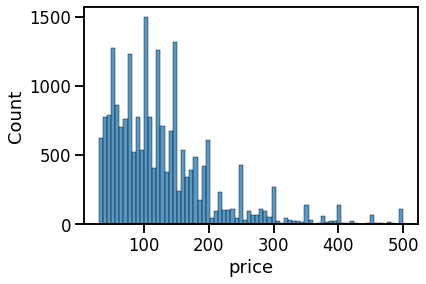

In [ ]:
#Filtramos precios por percentiles calculados.
copy_airbnb_df = copy_airbnb_df[(airbnb_df['price'] <= percentile_x) & (airbnb_df['price'] >= percentile_l)]
seaborn.histplot(copy_airbnb_df.price)


##Observamos que hemos filtrado correctamente. El mínimo valor de alquiler es de 30, y el máximo es de 500, que se corresponde con lo filtrado con los percentiles.

##Otra variable que se puede filtrar, es el zipcode, por orden de frecuencia, para quedarnos solamente con aquellos zipcodes más relevantes y que nos servirán para estimar un precio.

##Para poder unir los dataframes por zipcode, y añadirle la información del precio de alquiler al dataframe de melburne, debemos calcular el promedio de alquiler por zipcode. Se puede utilizar tanto la mediana como la media.

In [ ]:
relevant_cols = ['price', 'zipcode' ]

# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).

airbnb_price_by_zipcode = copy_airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'median', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_median','price median': 'airbnb_price_median', 'price count': 'airbnb_record_count'})

airbnb_price_by_zipcode

,zipcode,airbnb_price_median,airbnb_price_median,airbnb_record_count
0,2010.0,40.00000,40.0,1
1,2134.0,50.00000,50.0,1
2,2582.0,104.00000,104.0,1
3,3000.0,139.23438,129.0,3281
4,3001.0,132.50000,132.5,2
...,...,...,...,...
242,7367.0,230.00000,230.0,1
243,8938.0,296.00000,296.0,1
244,9004.0,226.00000,226.0,1
245,9540.0,245.00000,245.0,1


cantidad de zipcodes eliminados: 64 , con una coincidencia de apenas: 1.1203716354693265 % en la base de datos original


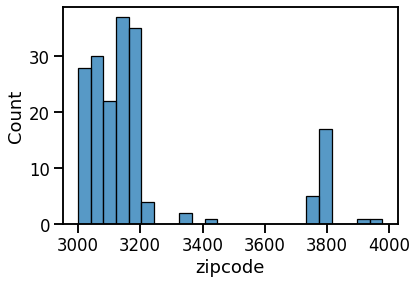

In [ ]:
#Se crea un dataframe nuevo al que modificaremos su zipcode
freq_bnb_filter = airbnb_price_by_zipcode
len_before = len(freq_bnb_filter)

#Vemos que el cuartil tiene como límite inferior 25% un valor de 8 ocurrencias
#Por lo tanto, debemos filtrar estos zipcodes que ocurren menos de 8 veces.
#print(copy_airbnb_df.zipcode.value_counts().describe())

#Nos quedamos con aquellos registros que tengan al menos 8 ocurrencias
freq_bnb_filter = freq_bnb_filter[(freq_bnb_filter.airbnb_record_count > 8)]
len_after = len(freq_bnb_filter)

#Se mide qué porcentaje de los datos fueron eliminados, así se verificará si la
#cantidad de datos eliminados representan una magnitud a tener en cuenta
erased_zips = airbnb_price_by_zipcode[(airbnb_price_by_zipcode.airbnb_record_count <= 8)]
list_erased = list(erased_zips.zipcode)
len(list_erased)


#Chequeamos en cuántas de nuestro dataframe base aparecen estos zipcodes que hemos descartado
coincidences = len(copy_airbnb_df[copy_airbnb_df.zipcode.isin(list_erased)])
print("cantidad de zipcodes eliminados:", len(list_erased) ,", con una coincidencia de apenas:",\
      100*coincidences/len(copy_airbnb_df), "% en la base de datos original")

#Se grafican los resultados en un histograma
seaborn.histplot(freq_bnb_filter.zipcode)

In [ ]:
# #Vemos que el cuartil tiene como límite inferior 25% un valor de 8 ocurrencias
# #Por lo tanto, debemos filtrar estos zipcodes que ocurren menos de 8 veces.
# print(copy_airbnb_df.zipcode.value_counts().describe())


# #Se crea un dataframe nuevo al que modificaremos su zipcode
# freq_bnb_filter = copy_airbnb_df


# #Se crea una lista que contiene los zipcodes cuya ocurrencia es menor a 8
# filtering_parameters = freq_bnb_filter.zipcode.value_counts().to_frame()
# filtering_parameters = filtering_parameters[(filtering_parameters['zipcode'] < 8)]
# filtering_list = list(filtering_parameters.index)


# #Se filtra el dataframe original, utilizando como referencia la lista  
# #con los zipcodes que no deseamos
# freq_bnb_filter = freq_bnb_filter[~(freq_bnb_filter.zipcode.isin(filtering_list))]


# #Se mide qué porcentaje de los datos fueron eliminados, así se verificará si la
# #cantidad de datos eliminados representan una magnitud a tener en cuenta
# eliminated_data = len(copy_airbnb_df) - len(freq_bnb_filter)
# print("cantidad de datos eliminados:", eliminated_data ,", los cuales representan el:", 100*eliminated_data/len_before_filtering, "de los datos eliminados")


# #Se grafican los resultados en un histograma
# seaborn.histplot(freq_bnb_filter.zip_freq)



##Una vez filtrado el dataframe de airbnb, realizamos un merge de ambos dataframes (melburne y airbnb)

In [ ]:
merged_by_zip = melb_df.merge(
    freq_bnb_filter, how='left',
    left_on='Postcode', right_on='zipcode'
)


In [ ]:
merged_by_zip.sample(5)
merged_by_zip.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode',
       'airbnb_price_median', 'airbnb_price_median', 'airbnb_record_count'],
      dtype='object')

##2.C: Existen otras variables que se podrían utilizar para unir los dataframes, asumiendo que somos expertos en el área o contamos con las herramientas/asesoramiento necesario para hacerlo.

##Un ejemplo de estas variables es la variable de longitud y altitud, que están en ambos dataframes. Se pueden subdividir en rangos, y agruparlas siguiendo ese orden.

##Otro modo de unirlos, es por la cantidad de baños que poseen las propiedades. Podemos ver que en ambos dataframes se brinda información acerca de la cantidad de baños que poseen, entonces se puede utilizar esta variable numérica como referencia.


#hasta acá va el desarrollo del ejercicio 2
________________________________________________________________________________

________________________________________________________________________________

________________________________________________________________________________


#Me falta filtrar LOS PRECIOS DE AIRBNB


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)











**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

Leemos el conjunto de datos

In [ ]:
merged_by_zip.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_median,airbnb_price_median,airbnb_record_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
#Se realiza una copia del DF de la parte 1 y se eliminan las columnas 'BuildingArea' y 'YearBuilt' (en realidad no las borro porque luego las uso)
DF_Encoding= merged_by_zip.copy()
#no se eliminan las columas ya que en el punto dos las volvemos a agregar
#DF_Encoding=DF_Encoding.drop(['BuildingArea', 'YearBuilt'], axis=1)
DF_Encoding.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_median,airbnb_price_median,airbnb_record_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,118.547619,100.0,252.0


Vemos las columnas y elegimos las variables categoricas y las numericas

In [ ]:
DF_Encoding.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode',
       'airbnb_price_median', 'airbnb_price_median', 'airbnb_record_count'],
      dtype='object')

In [ ]:
DF_Encoding.Regionname.nunique()
#Vemos que Regionname tiene 8 elementos. Tal vez sea mejor para poder imputar, así tenemos más muestras.
#Esto se debería complementar con otras variables para mejorar la predicción.

8

In [ ]:
#Seleccionamos las variables y hacemos una visualizacion de la cantidad de categorias y si tienen valores faltantes
categorical_cols = ['Type','Regionname'] #anlizar si es necesario agregaar alguna otra variable
#Yo cambiaría suburb por regionname



numerical_cols = ['Price','Rooms','Bathroom','airbnb_price_median'] #analizar si es necesario agregaar alguna otra variable
#es necesario generar un DF con solo estas columnas o seguimosusando todo el DF completo?? 

In [ ]:
DF_Encoding[categorical_cols].nunique()

Type          3
Regionname    8
dtype: int64

In [ ]:
DF_Encoding[categorical_cols].isna().sum()

Type          0
Regionname    0
dtype: int64

OneHotEncoding de la variable Type y Region name



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(DF_Encoding[['Type']])

encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

In [ ]:
encoded_type = encoder.transform(DF_Encoding[['Type']])
encoded_type[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
#generamos el DF con Type
encoded_type_df = pandas.DataFrame(data=encoded_type, columns=encoder.categories_)


In [ ]:
encoded_type_df.head(5)

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(DF_Encoding[['Regionname']])

encoder.categories_

[array(['Eastern Metropolitan', 'Eastern Victoria',
        'Northern Metropolitan', 'Northern Victoria',
        'South-Eastern Metropolitan', 'Southern Metropolitan',
        'Western Metropolitan', 'Western Victoria'], dtype=object)]

In [ ]:
encoded_Suburb = encoder.transform(DF_Encoding[['Regionname']])
encoded_Suburb[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
#generamos el DF con Regionname
encoded_Suburb_df = pandas.DataFrame(data=encoded_Suburb, columns=encoder.categories_)


In [ ]:
encoded_Suburb_df.head(5)

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#generamos el DF con el OneHotEncoding correspondiente al punto 1

In [ ]:
DF_OneHot=encoded_type_df.join(encoded_Suburb_df, rsuffix='')
DF_OneHot.head(5)

,h,t,u,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#le agregamos al DF original el OneHotEncoding
#no se porque a los nombres de las columnas las pone entre ()
#suele dar error, luego de volver a ejecutar todo desde cero funciona

DF_Encoding=DF_Encoding.join(DF_OneHot, rsuffix='')
DF_Encoding.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,"(t,)","(u,)","(Eastern Metropolitan,)","(Eastern Victoria,)","(Northern Metropolitan,)","(Northern Victoria,)","(South-Eastern Metropolitan,)","(Southern Metropolitan,)","(Western Metropolitan,)","(Western Victoria,)"
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
DF_Imputer =DF_Encoding.copy(deep=True)


from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer


#Es necesario hacer una estandarizacion y escalacion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(DF_Imputer[numerical_cols])

array([[ 0.63244803, -0.98146337, -0.77237552,  0.22951047,  0.38239524],
       [-0.06363975, -0.98146337, -0.77237552,  0.22951047,  0.38239524],
       [ 0.6089844 ,  0.06487613,  0.67336667,  0.22951047,  0.38239524],
       ...,
       [ 0.14753294,  0.06487613,  0.67336667,  2.48859911,  3.26076874],
       [ 2.22797508,  1.11121563, -0.77237552,  2.48859911,  3.26076874],
       [ 0.3274208 ,  1.11121563, -0.77237552,  0.90603721,  0.70621226]])

In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

DF_Imputer[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(DF_Imputer[['YearBuilt','BuildingArea']])


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#Es necesario hacer la transformacion inversa? Me da error. No es necesaria hacerla. Lo que ahce es volver lo que escalamos al valor original.
#DF_Imputer = scaler.inverse_transform(DF_Imputer['YearBuilt','BuildingArea'])

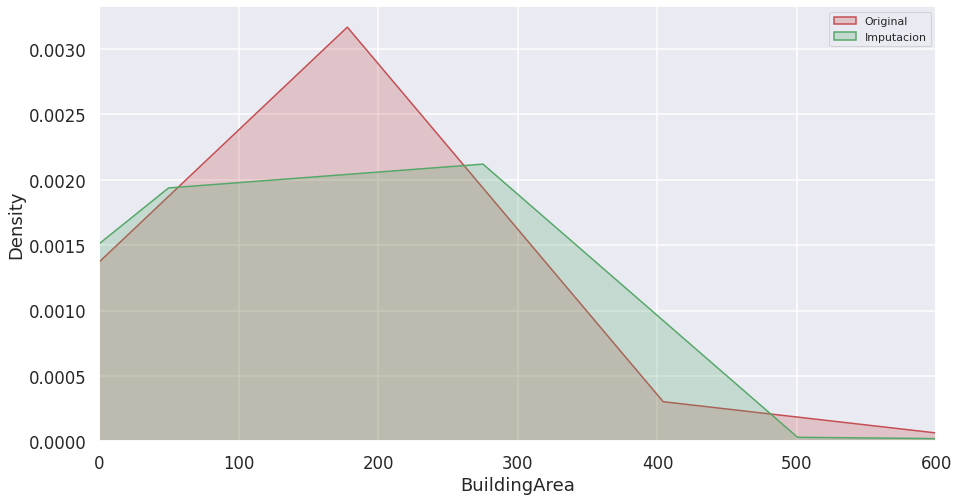

In [ ]:
#Grafico antes y luego de la imputacion. Al no poder hacer la transformacion inversa desconfio de los graficos.

import seaborn as sns
sns.set_context('talk')

sns.kdeplot(DF_Encoding['BuildingArea'],color='r', shade=True, cbar=True)
sns.kdeplot(DF_Imputer['BuildingArea'],color='g', shade=True, cbar=True)
sns.set(rc = {'figure.figsize': (15,8)})
plt.xlim(0,600)
plt.legend(labels=["Original","Imputacion"])
plt.show()

## Ejercicio 3: Reducción de dimensionalidad.
Utilizando la matriz obtenida en el ejercicio anterior:

Aplique PCA para obtener  n  componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?
Grafique la varianza capturada por los primeros  n  componentes principales, para cada  n .
En base al gráfico, seleccione las primeras  m  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado
Transformar nuevamente el conjunto de datos procesado en un pandas.DataFrame y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:

El método OneHotEncoder.get_feature_names o el atributo OneHotEncoder.categories_ permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Generamos un CSV con los DF de los puntos anteriores

In [ ]:
####

#Hay que cambiar el nombre de DF_Imputer por el DF del punto 3 cuando este punto este listo

DF_Imputer.to_csv("DF_TP2.csv", index=None)

In [ ]:
from google.colab import files
files.download('DF_TP2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
